# Actividad: Problemas de optimización local

- Diseño de agentes inteligentes
- TC2032.101
- Profesor: Juan Emmanuel Martínez Ledesma
- Equipo 7:

| Alumno | Matrícula |
| ---- | ---- |
| Juan Pablo Echeagaray González | A00830646 |
| Emily Rebeca Méndez Cruz | A00830768 |

In [1]:
import mlrose_hiive as mlr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


## Problema 1: N Queens

Utilicen los algoritmos de caminata aleatoria y de escalada simple para buscar una solución al problema de las 8 reinas, y comparen el rendimiento de estos algoritmos con la solución proporcionada en esta actividad con recocido simulado. ¿Qué algoritmo permite encontrar una solución al problema?


### Funciones auxiliares

In [2]:
def position_creator(positions: list) -> list:
    index = [[x, y] for x, y in zip(range(len(positions)), positions)]
    return index


def board_printer(positions):
    # Zeros everywhere except for the positions
    board = np.zeros((len(positions), len(positions)))
    for i, j in positions:
        board[j][i] = 1
    return board
    

### Planteación del problema

In [3]:
fitness = mlr.Queens()
problem = mlr.DiscreteOpt(length=8, fitness_fn=fitness, maximize=False, max_val=8)
schedule = mlr.ExpDecay()
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])


### Escalada simple

In [4]:
%%timeit
hill_best_state, hill_best_fitness, _ = mlr.hill_climb(problem, max_iters=1000, restarts=0, init_state=init_state, curve=True)


121 ms ± 9.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
hill_best_state, hill_best_fitness, _ = mlr.hill_climb(problem, max_iters=1000, restarts=0, init_state=init_state, curve=True)
hill_positions = position_creator(hill_best_state)


In [6]:
print(f'Hill best fitness: {hill_best_fitness}')
board_printer(hill_positions)


Hill best fitness: 2.0


array([[0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

### Caminata aleatoria

In [7]:
%%timeit
random_hill_best_state, random_hill_best_fitness, _ = mlr.random_hill_climb(problem, max_iters=1000, restarts=0, init_state=init_state, curve=True)


10.7 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
rand_hill_best_state, rand_hill_best_fitness, _ = mlr.random_hill_climb(problem, max_iters=100000, restarts=0, 
                                                    init_state=init_state, curve=True)
rand_hill_positions = position_creator(rand_hill_best_state)


In [9]:
print(f'Random Hill Climb best fitness: {rand_hill_best_fitness}')
board_printer(rand_hill_positions)


Random Hill Climb best fitness: 4.0


array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]])

### Recocido simulado

In [10]:
%%timeit
ann_best_state, ann_best_fitness, _ = mlr.simulated_annealing(problem, schedule=schedule, max_attempts=100,
                                                      max_iters=1000, init_state=init_state,
                                                      random_state=1)

402 ms ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
ann_best_state, ann_best_fitness, _ = mlr.simulated_annealing(problem, schedule=schedule, max_attempts=100,
                                                      max_iters=10000, init_state=init_state,
                                                      random_state=1)
ann_positions = position_creator(ann_best_state)


In [12]:
print(f'Simulated Annealing best fitness: {ann_best_fitness}')
board_printer(ann_positions)


Simulated Annealing best fitness: 0.0


array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.]])

Al parecer ninguno de los 2 algoritmos produce una solución válida. Hemos incrementado el número de iteraciones a 1000 para todos los algoritmos, e incluso así los algoritmos de hill climbing no pudieron encontrar una solución

## Problema 2: Travelling Salesperson Problem (TSP)

La siguiente figura muestra una colección de puntos en el plano, los cuales se quieren unir con lineas rectas de tal forma que se forme una figura cerrada. Cada punto sólo puede estar conectado a otros dos puntos.

![](img/2022-03-11-07-44-07.png)

Utilicen los algoritmos de búsqueda voraz y de recocido simulado para encontrar la forma como se conectarían los puntos, de tal forma que la suma de las longitudes de las líneas que conectan la figura sea la menor posible. ¿Con qué algoritmo se obtiene los mejores resultados?


In [37]:
# Create a list of coordinates
np.random.seed(0)
n_cities = 31
max_range = 200
cities = np.random.randint(low=0, high=max_range, size=(n_cities, 2))
cities_tsp = [(x, y) for x, y in cities]


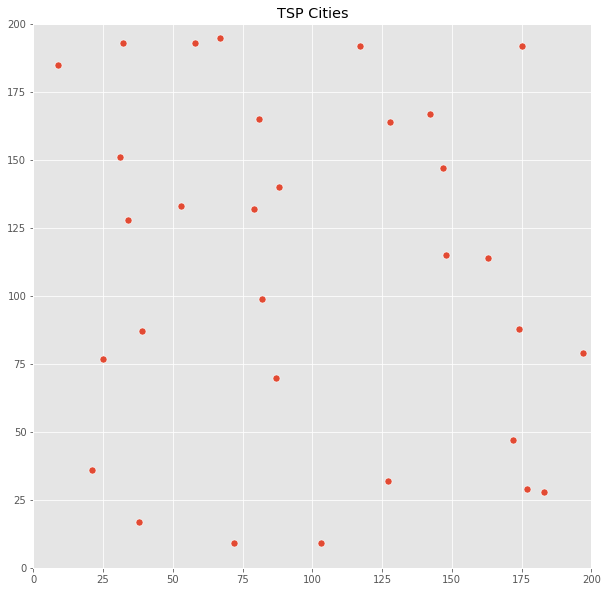

In [38]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x=cities[:, 0], y=cities[:, 1], s=50)
ax.set_xlim(0, max_range)
ax.set_ylim(0, max_range)
ax.set_title('TSP Cities');


In [39]:
fitness_coords = mlr.TravellingSales(coords=cities_tsp)


In [40]:
problem_fit = mlr.TSPOpt(
    length=n_cities, fitness_fn=fitness_coords, maximize=False)


In [41]:
def route_printer(order):
    for i in range(len(order)):
        if i == len(order) - 1:
            print(order[i])
        else:
            print(order[i], end=' -> ')

### Recocido simulado

In [46]:
ann_tsp_best_state, ann_tsp_best_fitness, _ = mlr.simulated_annealing(problem_fit, schedule=schedule, max_attempts=10000, random_state=0)

In [47]:
ann_tsp_best_fitness

1180.2860658138484

In [48]:
ann_tsp_best_state

array([18, 24, 13, 10,  6, 30, 28, 26, 23, 21, 20,  7,  2,  8, 11,  4, 29,
       12,  3, 22,  5, 16,  9,  0, 17, 25, 14, 15, 19,  1, 27])

In [49]:
route_printer(ann_tsp_best_state)

18 -> 24 -> 13 -> 10 -> 6 -> 30 -> 28 -> 26 -> 23 -> 21 -> 20 -> 7 -> 2 -> 8 -> 11 -> 4 -> 29 -> 12 -> 3 -> 22 -> 5 -> 16 -> 9 -> 0 -> 17 -> 25 -> 14 -> 15 -> 19 -> 1 -> 27


### Búsqueda voraz